In [219]:
# Setup + tratamento e modelagem dos dados
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('../dbs/historico-alg1_SIGA_ANONIMIZADO.csv', sep=',')

print('Este estudo analisa o aproveitamento de estudantes na disciplina ALGORITMOS 1 entre os anos de 2011 e 2022.\nSerão desconsiderados registros de equivalência por se tratar de outro processo.')
df = df[df['tipo'] != 'EQUIVALENCIA']
df['status'] = df['status'].str.replace('Reprovado','R-freq')

df['rep_nota'] = df['status'] == 'R-nota'
df['rep_nota_int'] = 0
df.loc[df['rep_nota'], 'rep_nota_int'] = 1

df['rep_freq'] = df['status'] == 'R-freq'
df['rep_freq_int'] = 0
df.loc[df['rep_freq'], 'rep_freq_int'] = 1

df['rep_todos'] = ((df['status'] == 'R-freq') | (df['status'] == 'R-nota'))
df['rep_todos_int'] = 0
df.loc[df['rep_todos'], 'rep_todos_int'] = 1

df['status_cancelado'] = df['status'] == 'Cancelado'
df['status_cancelado_int'] = 0
df.loc[df['status_cancelado'], 'status_cancelado_int'] = 1

df['sit_evasao'] = df['situacaoDiscente'] == 'Evasão'
df['sit_evasao_int'] = 0
df.loc[df['sit_evasao'], 'sit_evasao_int'] = 1

df['periodo_grupo'] = 'anos_referencia'
df.loc[df['ano'] >= 2020 , 'periodo_grupo'] = 'anos_pandemia'
df.loc[(df['ano'] == 2022) & (df['periodo'] == '1') , 'periodo_grupo'] = 'semestre_hib_22_1'
df.loc[(df['ano'] == 2022) & (df['periodo'] == '2') , 'periodo_grupo'] = 'semestre_hib_22_2'

aprovados = df[df['status']=='Aprovado']
rep_nota = df[df['status']=='R-nota']
rep_freq = df[df['status']=='R-freq']

def fprc(numero):
    return "{:.2%}".format(numero)

def gen_bar_graph(data:pd.Series,avg:float,title:str,leg_pos:str='lower right')->plt.show:
    gr12 = data.plot(kind='bar')
    gr12.bar_label(gr12.containers[0],size=9)
    plt.title(title)
    plt.axhline(
        y=avg,
        color='r',
        linestyle='--',
        alpha=0.5,
        label='média geral'
        )
    plt.legend(loc=leg_pos)
    plt.xticks(rotation=45)
    plt.show()

def gen_2bar_graph(data:pd.Series,title:str,comment:str,com_pos:float=0.2)->plt.show:
    x = range(len(data))
    plt.bar(x, data, tick_label=data.index, color=['blue', 'gray'])
    for i, value in enumerate(data):
        plt.text(i, value + 0.5, str(value), ha='center')
    plt.title(title)
    plt.figtext(0.5, com_pos, comment, ha='center', bbox=dict(facecolor='white', alpha=0.9, boxstyle='round'))
    plt.show()

Este estudo analisa o aproveitamento de estudantes na disciplina ALGORITMOS 1 entre os anos de 2011 e 2022.
Serão desconsiderados registros de equivalência por se tratar de outro processo.


Média geral de nota dos aprovados no período total: 77.58


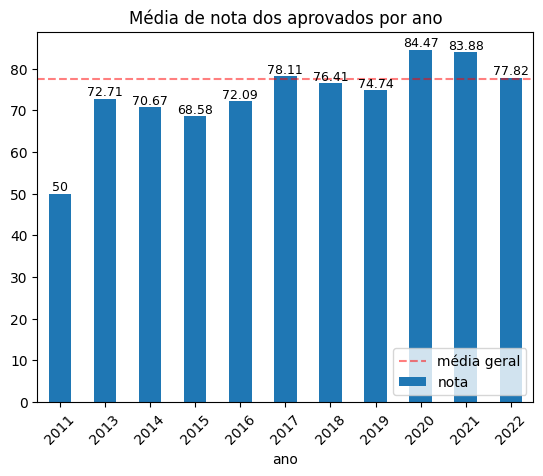

In [189]:
# 1. Qual é a média de nota dos aprovados (no período total e por ano)?
r11 = aprovados['nota'].mean().round(2)
print('Média geral de nota dos aprovados no período total:',end=' ')
print(r11)

r12 = aprovados.groupby('ano')['nota'].mean().round(2)
gen_bar_graph(r12,r11,'Média de nota dos aprovados por ano')

Média de nota dos reprovados por nota no período total: 22.04


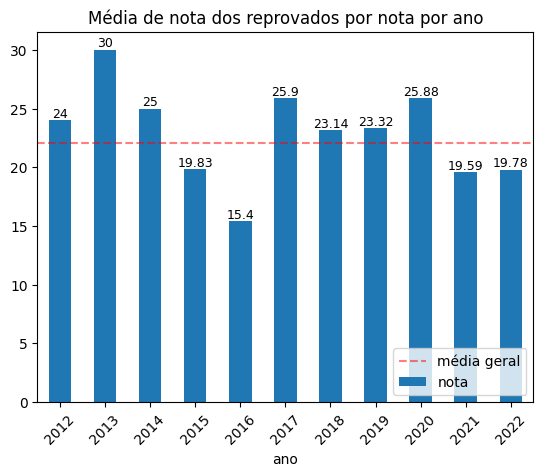

In [190]:
# 2. Qual é a média de nota dos reprovados por nota?
r21 = rep_nota['nota'].mean().round(2)
print('Média de nota dos reprovados por nota no período total:',end=' ')
print(r21)
r22 = rep_nota.groupby('ano')['nota'].mean().round(2)
gen_bar_graph(r22,r21,'Média de nota dos reprovados por nota por ano')

Frequência dos reprovados por nota no período total: 21.15


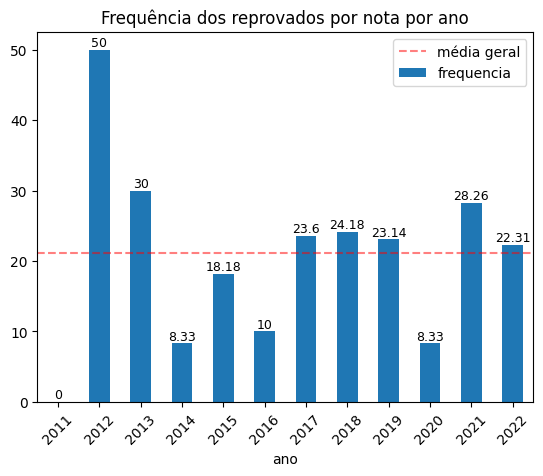

* dados em pontos percentuais


In [191]:
# 3. Qual é a frequência dos reprovados por nota?
r31 = (df['rep_nota_int']*100).mean().round(2)
print('Frequência dos reprovados por nota no período total:',end=' ')
print(r31)
r32 = (df.groupby('ano')['rep_nota_int'].mean()*100).round(2)
r32 = r32.rename("frequencia")
gen_bar_graph(r32,r31,'Frequência dos reprovados por nota por ano','upper right')
print('* dados em pontos percentuais')

Porcentagem de evasões no período total: 15.27


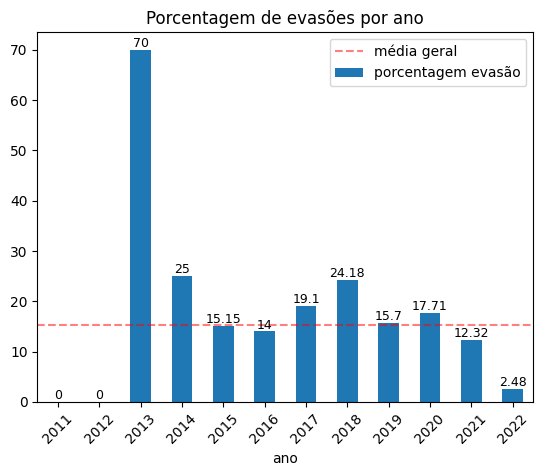

* dados em pontos percentuais


In [192]:
# 4. Qual a porcentagem de evasões (total e anual)?
r41 = (df['sit_evasao_int'].mean()*100).round(2)
print('Porcentagem de evasões no período total:',end=' ')
print(r41)
r42 = (df.groupby('ano')['sit_evasao_int'].mean()*100).round(2)
r42 = r42.rename("porcentagem evasão")
gen_bar_graph(r42,r41,'Porcentagem de evasões por ano','upper right')
print('* dados em pontos percentuais')

5. Comparando os anos_pandemia com os anos_referencia (anos anteriores):


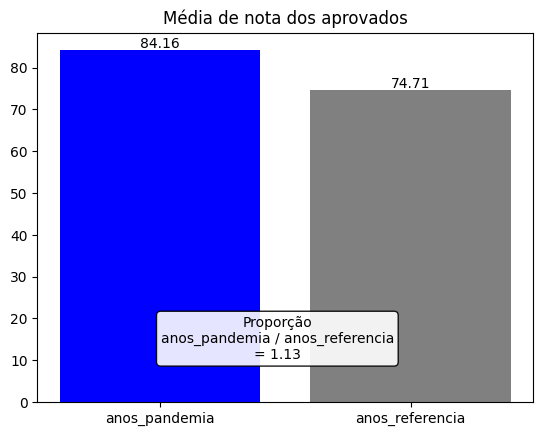

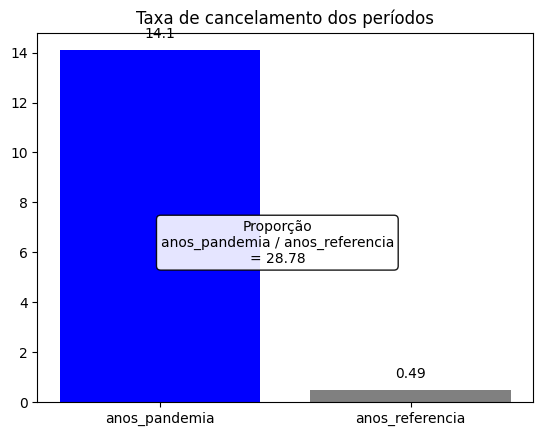

* dados em pontos percentuais


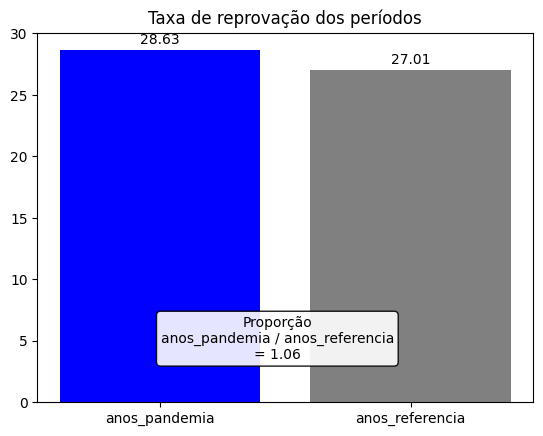

* dados em pontos percentuais


In [227]:
# 5. Como os anos de pandemia impactaram no rendimento dos estudantes?
gp_ref = 'anos_pandemia'
gp_comp = 'anos_referencia'

print(f'5. Comparando os {gp_ref} com os {gp_comp} (anos anteriores):')

rendimento_aprovados = aprovados.groupby('periodo_grupo')['nota'].mean().round(2)
rendimento_aprovados = rendimento_aprovados[[gp_ref,gp_comp]]
comp_rendimento = (rendimento_aprovados[gp_ref] / rendimento_aprovados[gp_comp]).round(2)
gen_2bar_graph(rendimento_aprovados,
               'Média de nota dos aprovados',
               f'Proporção\n{gp_ref} / {gp_comp}\n= '+str(comp_rendimento))

taxa_cancelamento = (df.groupby('periodo_grupo')['status_cancelado_int'].mean()*100).round(2)
taxa_cancelamento = taxa_cancelamento[[gp_ref,gp_comp]]
comp_taxa_cancelamento = (taxa_cancelamento[gp_ref] / taxa_cancelamento[gp_comp]).round(2)
gen_2bar_graph(taxa_cancelamento,
               'Taxa de cancelamento dos períodos',
               f'Proporção\n{gp_ref} / {gp_comp}\n= '+str(comp_taxa_cancelamento),
               com_pos=0.4)
print('* dados em pontos percentuais')

taxa_reprovacao = (df.groupby('periodo_grupo')['rep_todos_int'].mean()*100).round(2)
taxa_reprovacao = taxa_reprovacao[[gp_ref,gp_comp]]
comp_taxa_reprovacao = (taxa_reprovacao[gp_ref] / taxa_reprovacao[gp_comp]).round(2)
gen_2bar_graph(taxa_reprovacao,
               'Taxa de reprovação dos períodos',
               f'Proporção\n{gp_ref} / {gp_comp}\n= '+str(comp_taxa_reprovacao))
print('* dados em pontos percentuais')


6. Comparando os semestre_hib_22_1 com os anos_pandemia:


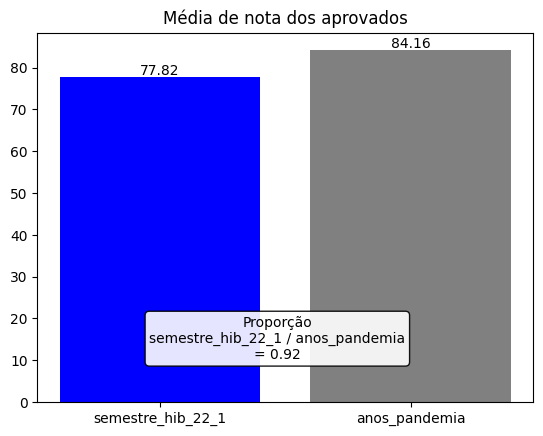

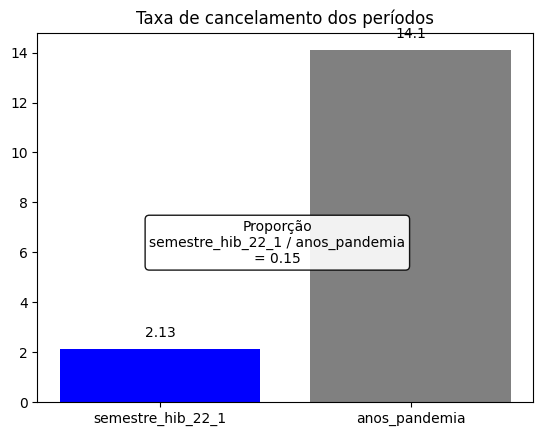

* dados em pontos percentuais


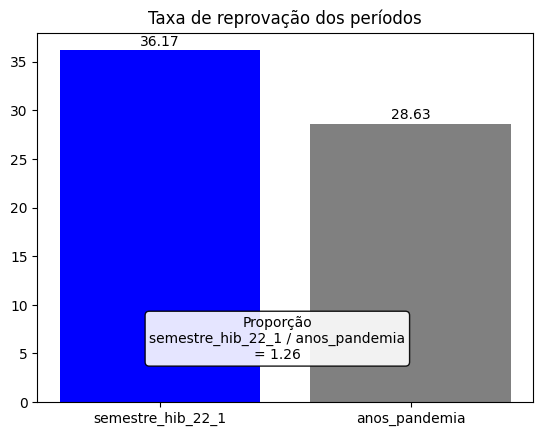

* dados em pontos percentuais


In [228]:
# 6. Compare a volta às aulas híbrida (2022 período 1) com os anos de pandemia e os anos anteriores.
gp_ref = 'semestre_hib_22_1'
gp_comp = 'anos_pandemia'

print(f'\n6. Comparando os {gp_ref} com os {gp_comp}:')

rendimento_aprovados = aprovados.groupby('periodo_grupo')['nota'].mean().round(2)
rendimento_aprovados = rendimento_aprovados[[gp_ref,gp_comp]]
comp_rendimento = (rendimento_aprovados[gp_ref] / rendimento_aprovados[gp_comp]).round(2)
gen_2bar_graph(rendimento_aprovados,
               'Média de nota dos aprovados',
               f'Proporção\n{gp_ref} / {gp_comp}\n= '+str(comp_rendimento))

taxa_cancelamento = (df.groupby('periodo_grupo')['status_cancelado_int'].mean()*100).round(2)
taxa_cancelamento = taxa_cancelamento[[gp_ref,gp_comp]]
comp_taxa_cancelamento = (taxa_cancelamento[gp_ref] / taxa_cancelamento[gp_comp]).round(2)
gen_2bar_graph(taxa_cancelamento,
               'Taxa de cancelamento dos períodos',
               f'Proporção\n{gp_ref} / {gp_comp}\n= '+str(comp_taxa_cancelamento),
               com_pos=0.4)
print('* dados em pontos percentuais')

taxa_reprovacao = (df.groupby('periodo_grupo')['rep_todos_int'].mean()*100).round(2)
taxa_reprovacao = taxa_reprovacao[[gp_ref,gp_comp]]
comp_taxa_reprovacao = (taxa_reprovacao[gp_ref] / taxa_reprovacao[gp_comp]).round(2)
gen_2bar_graph(taxa_reprovacao,
               'Taxa de reprovação dos períodos',
               f'Proporção\n{gp_ref} / {gp_comp}\n= '+str(comp_taxa_reprovacao))
print('* dados em pontos percentuais')

In [232]:
# 7. Compare a volta às aulas presencial (2022 período 2) com a volta híbrida do item anterior.
print('A base de dados foi gerada no início do semestre 2022.2,\ne estando este em progresso, não é possível compará-lo aos anteriores.')
print('\nUm dado possível de se analisar é o número de matriculados,\nque também reflete os dados de um semestre iniciando:\n')
n_alunos = df[df['ano'] == 2022].drop_duplicates(subset=['matricula','ano','periodo'])

n_aluno = n_alunos.groupby('periodo_grupo')['matricula'].count()
print(n_aluno)

A base de dados foi gerada no início do semestre 2022.2,
e estando este em progresso, não é possível compará-lo aos anteriores.

Um dado possível de se analisar é o número de matriculados,
que também reflete os dados de um semestre iniciando:

periodo_grupo
semestre_hib_22_1    94
semestre_hib_22_2    27
Name: matricula, dtype: int64
